# Importing libraries

In [1]:
import os
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from PIL import Image
import numpy as np

# Defining functions for data exploration

## Function to read labels

In [2]:
def read_labels(file_path):
    with open(file_path, 'r') as file:
        lines = file.readlines()
    return lines

## Function to read labels and count the occurrences of each class

In [3]:
def count_class_occurrences(label_path, class_names):
    class_counts = {class_name: 0 for class_name in class_names}

    with open(label_path, 'r') as file:
        lines = file.readlines()
        for line in lines:
            label = line.strip().split()
            label_class = int(label[0])
            class_name = class_names[label_class]
            class_counts[class_name] += 1

    return class_counts

## Function to plot the distribution of classes

In [4]:
def plot_class_distribution(dataset_name, class_counts):
    fig, ax = plt.subplots()
    ax.bar(class_counts.keys(), class_counts.values())
    ax.set_xlabel('Class')
    ax.set_ylabel('Count')
    ax.set_title(f'Distribution of Classes in the {dataset_name} Dataset')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

## Function to visualize images with bounding boxes

In [5]:
def visualize_image(image_path, label_path, class_names):
    image = Image.open(image_path)
    labels = read_labels(label_path)

    fig, ax = plt.subplots(1)
    ax.imshow(image)

    for label in labels:
        label = label.strip().split()
        label_class = int(label[0])
        x, y, width, height = map(float, label[1:])
        
        # Display bounding boxes for specific classes
        if class_names[label_class] == 'Rotten Tomato':
            rect = patches.Rectangle((x, y), width, height, linewidth=1, edgecolor='r', facecolor='none')
            ax.add_patch(rect)

    plt.show()

## Function to visualize a subset of images

In [6]:
def visualize_sample_images(images_path, labels_path, class_names, num_samples=5):
    sample_counter = 0

    for image_file in os.listdir(images_path):
        if image_file.endswith(".jpg") and sample_counter < num_samples:
            image_path = os.path.join(images_path, image_file)
            label_path = os.path.join(labels_path, image_file.replace(".jpg", ".txt"))

            visualize_image(image_path, label_path, class_names)

            sample_counter += 1

## Function to explore and visualize a dataset

In [7]:
def explore_dataset(dataset_name, images_path, labels_path, class_names, num_samples=5):
    total_class_counts = {class_name: 0 for class_name in class_names}

    for label_file in os.listdir(labels_path):
        if label_file.endswith(".txt"):
            label_path = os.path.join(labels_path, label_file)
            class_counts = count_class_occurrences(label_path, class_names)

            # Update total class counts
            for class_name, count in class_counts.items():
                total_class_counts[class_name] += count

    plot_class_distribution(dataset_name, total_class_counts)
    visualize_sample_images(images_path, labels_path, class_names, num_samples)

# Define the paths to your datasets

In [8]:
train_images_path = '/kaggle/input/tomato-detect/train/images'
train_labels_path = '/kaggle/input/tomato-detect/train/labels'
val_images_path = '/kaggle/input/tomato-detect/val/images'
val_labels_path = '/kaggle/input/tomato-detect/val/labels'
test_images_path = '/kaggle/input/tomato-detect/test/images'
test_labels_path = '/kaggle/input/tomato-detect/test/labels'

# Load class names from data.yaml

In [9]:
class_names = ["0", "1", "Fresh Tomato", "Rotten Tomato", "object"]

# Explore and visualize the training dataset

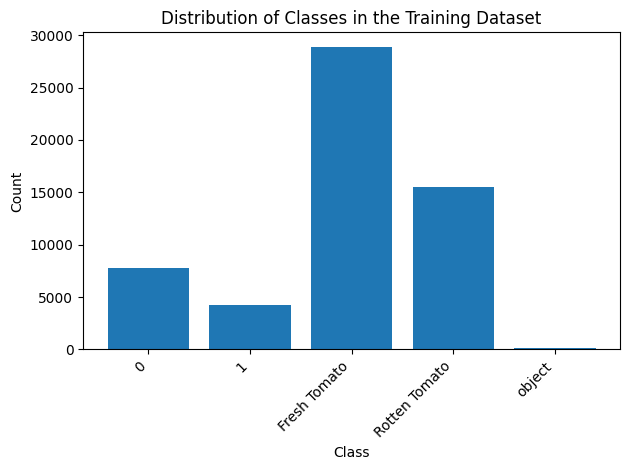

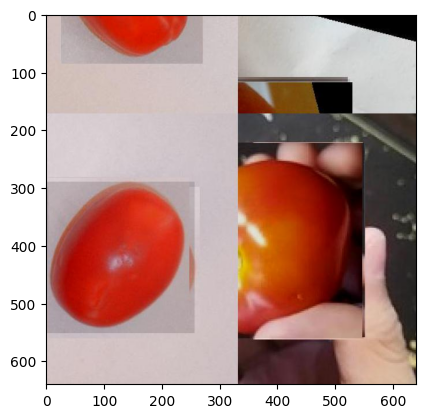

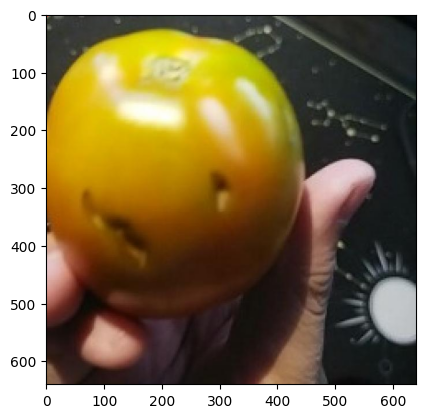

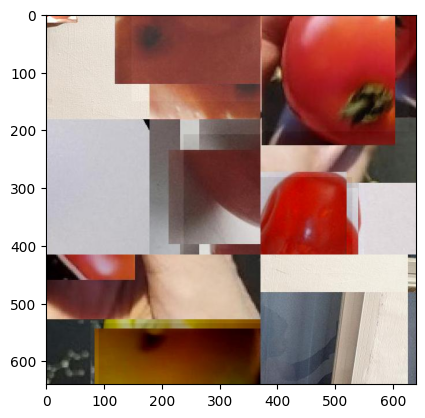

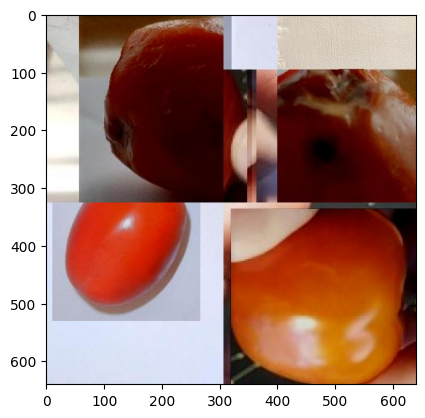

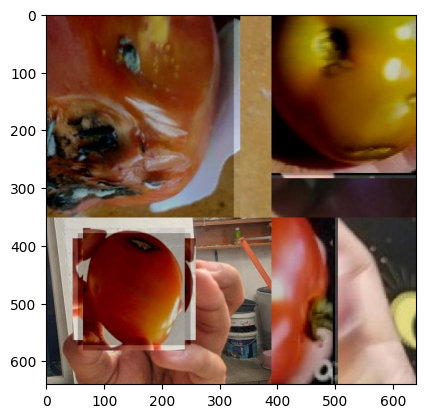

In [10]:
explore_dataset('Training', train_images_path, train_labels_path, class_names)

# Explore and visualize the validation dataset

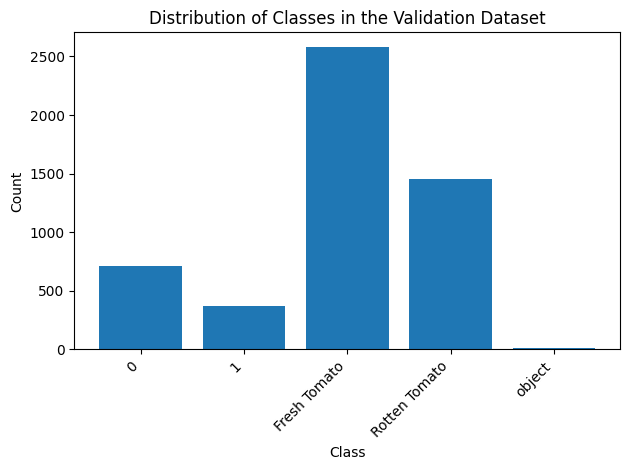

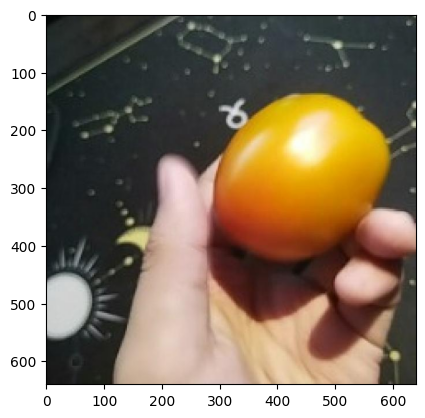

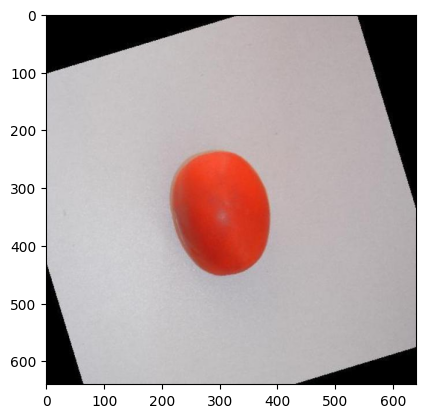

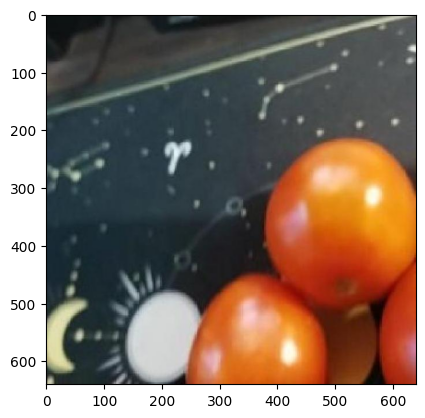

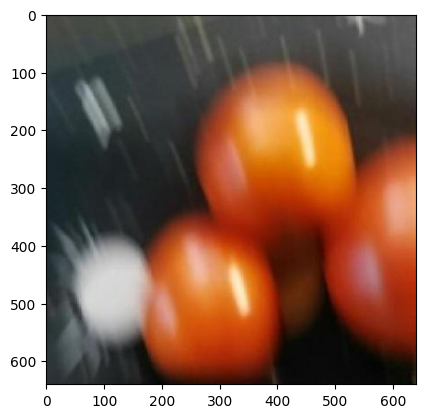

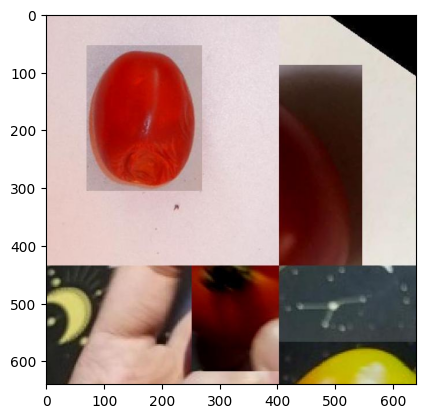

In [11]:
explore_dataset('Validation', val_images_path, val_labels_path, class_names)

# Explore and visualize the test dataset

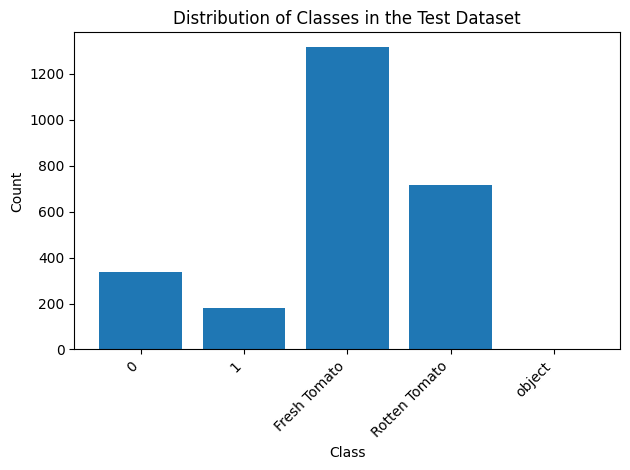

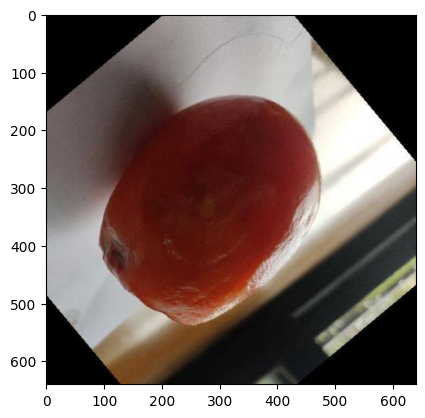

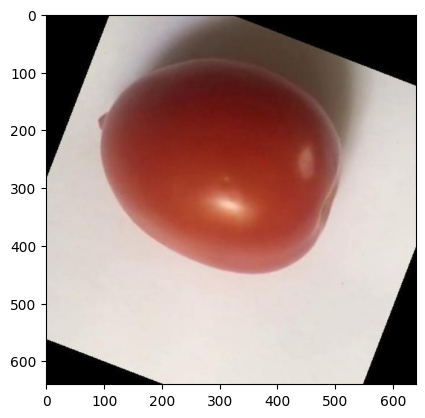

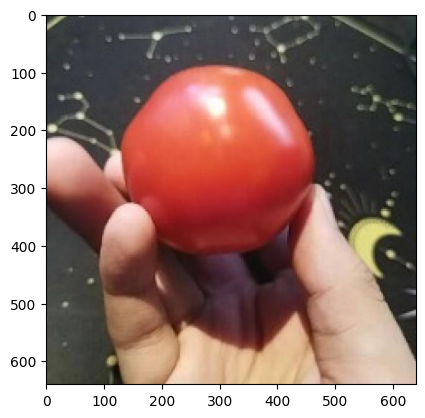

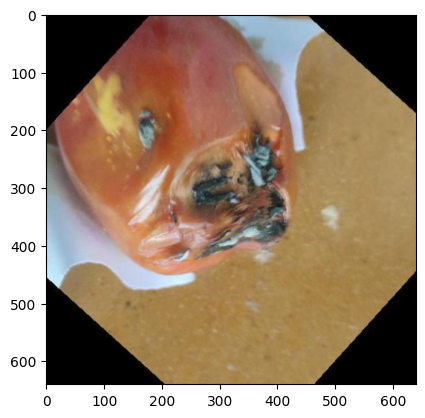

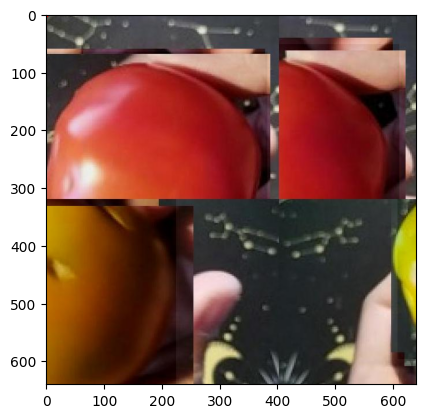

In [12]:
explore_dataset('Test', test_images_path, test_labels_path, class_names)